In [1]:
#import librerais
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_PATH = 'Data/processed/cleaned_data.csv'
df=pd.read_csv(DATA_PATH)
df.head(5)

,proprety_type,surface,bedroom,bathroom,address,city,principale,price_dh
0,Apartment,130.0,2,2,"Ennakhil-(Palmeraie), Marrakech, Marrakesh-Safi",Marrakech,Marrakech-Safi,5045690.0
1,House,400.0,4,6,"Ménara, Marrakech, Marrakech-Safi",Marrakech,Marrakech-Safi,14032400.0
2,Apartment,83.0,2,2,"Guéliz, Marrakech, Marrakech-Safi 40000",Marrakech,Marrakech-Safi,2580719.0
3,Apartment,127.0,3,2,"Anfa, Casablanca, Casablanca-Settat",Casablanca,Casablanca-Settat,6219190.0
4,Apartment,120.0,2,2,"Ménara, Marrakech, Marrakech-Safi",Marrakech,Marrakech-Safi,4367160.0


In [3]:
df.isnull().sum()

proprety_type    0
surface          0
bedroom          0
bathroom         0
address          0
city             0
principale       0
price_dh         0
dtype: int64

In [4]:
df.dtypes

proprety_type     object
surface          float64
bedroom            int64
bathroom           int64
address           object
city              object
principale        object
price_dh         float64
dtype: object

In [5]:
df.describe()

,surface,bedroom,bathroom,price_dh
count,322.000000,322.000000,322.000000,3.220000e+02
mean,262.870807,3.909938,3.354037,8.006512e+06
std,154.836565,1.849803,2.251783,5.620128e+06
min,33.000000,1.000000,1.000000,4.562880e+05
25%,130.015000,3.000000,2.000000,3.562580e+06
50%,224.000000,4.000000,3.000000,6.491355e+06
75%,384.500000,5.000000,4.000000,1.183037e+07
max,599.010000,14.000000,16.000000,2.673746e+07


In [6]:
df.corr()

ValueError: could not convert string to float: 'Apartment'

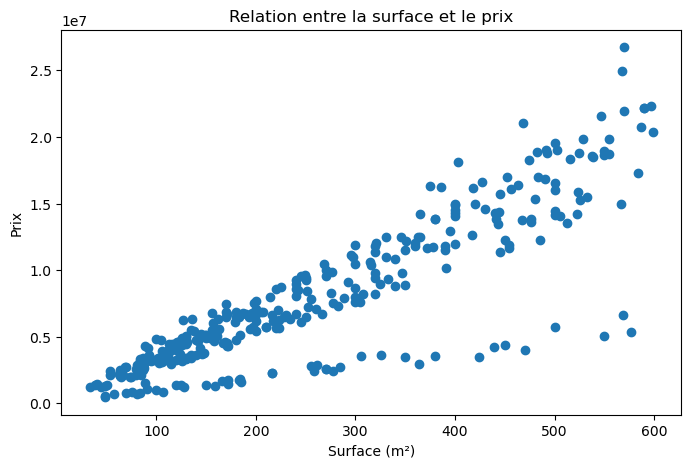

In [7]:
# visualiser le prix en fonction de la surface
plt.figure(figsize=(8,5))
plt.scatter(df['surface'], df['price_dh'])
plt.xlabel("Surface (m²)")
plt.ylabel("Prix")
plt.title("Relation entre la surface et le prix")
plt.show()

In [ ]:
#les champs catégoriels

In [8]:
# normalisation des noms des régions
corrections = {
    "Marrakesh-Safi": "Marrakech-Safi",
   
    "Casablanca": "Casablanca-Settat",
    "Souss-Massa-Draa": "Souss-Massa",
    "Tangier-Tétouan-Al Hoceima": "Tanger-Tétouan-Al Hoceïma",
    "Tanger-Tétouan-Al Hoceima": "Tanger-Tétouan-Al Hoceïma",
    "Morocco": 'Marrakech-Safi',
    "Agadir":'Souss-Massa',
    "Casablanca":'Casablanca-Settat',
    "Safi":'Marrakech-Safi',
     "Fez":'Fès-Meknès',
     "Essaouira":'Marrakech-Safi'
    
}

# Remplacer les valeurs incorrectes
df["principale"] = df["principale"].replace(corrections)

In [9]:
df['principale'].value_counts()

principale
Marrakech-Safi               245
Casablanca-Settat             31
Rabat-Salé-Kénitra            23
Souss-Massa                   12
Tanger-Tétouan-Al Hoceïma      9
Drâa-Tafilalet                 1
Fès-Meknès                     1
Name: count, dtype: int64

In [10]:
df[df['principale']=='Drâa-Tafilalet']

,proprety_type,surface,bedroom,bathroom,address,city,principale,price_dh
264,House,364.0,1,1,"Zagora, Zagora",Zagora,Drâa-Tafilalet,2974244.0


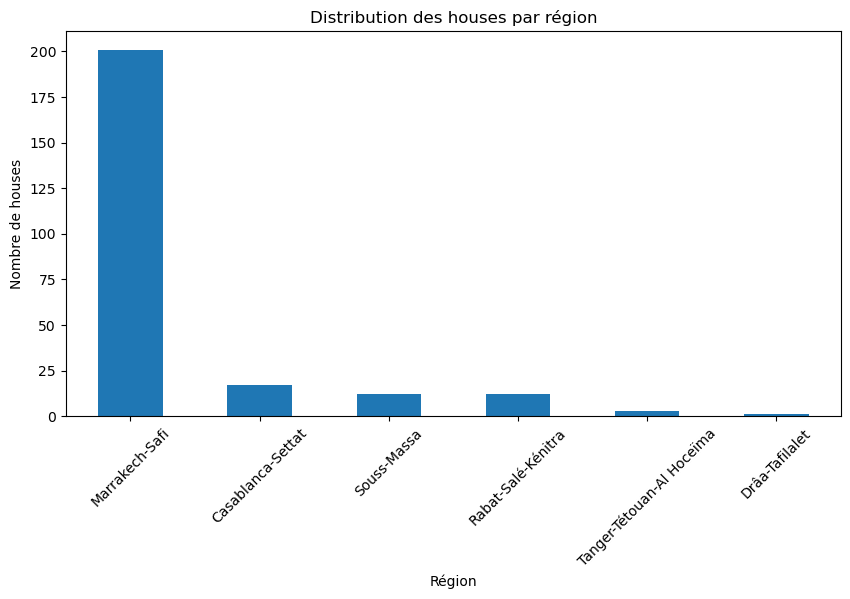

In [11]:
# visualiser la distribution des houses dans les regions
# filtrer les houses
df_houses = df[df["proprety_type"] == "House"]
plt.figure(figsize=(10,5))
df_houses["principale"].value_counts().plot(kind="bar")

plt.title("Distribution des houses par région")
plt.xlabel("Région")
plt.ylabel("Nombre de houses")
plt.xticks(rotation=45)
plt.show()

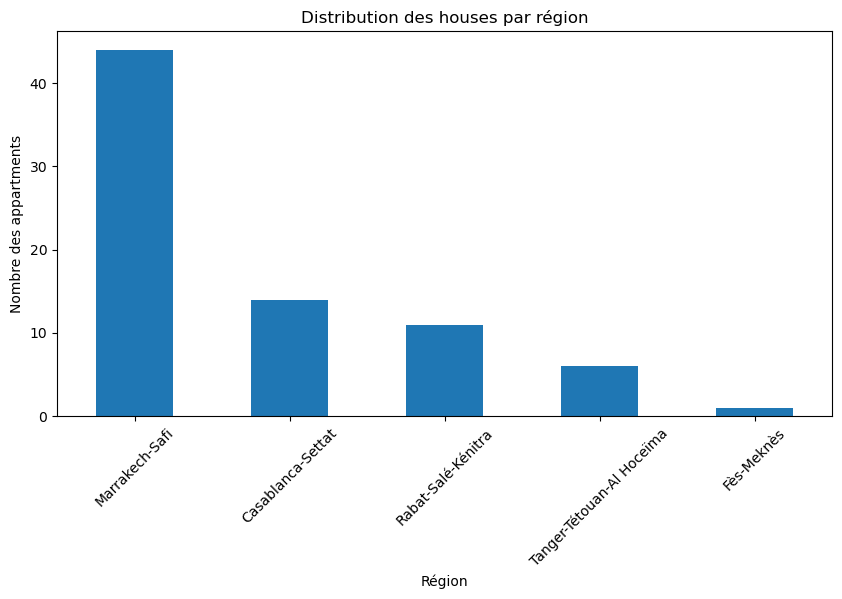

In [12]:
# on va faire le meme pour les appartement
df_appartment = df[df["proprety_type"] == "Apartment"]
df_appartment.describe()
plt.figure(figsize=(10,5))
df_appartment["principale"].value_counts().plot(kind="bar")
plt.title("Distribution des houses par région")
plt.xlabel("Région")
plt.ylabel("Nombre des appartments")
plt.xticks(rotation=45)
plt.show()

In [13]:
# le prix moyen par région
prix_moyen_region = df.groupby("principale")["price_dh"].mean().sort_values(ascending=False)
prix_moyen_region


principale
Marrakech-Safi               8.626310e+06
Rabat-Salé-Kénitra           7.955476e+06
Casablanca-Settat            7.133649e+06
Souss-Massa                  3.068200e+06
Drâa-Tafilalet               2.974244e+06
Tanger-Tétouan-Al Hoceïma    2.127761e+06
Fès-Meknès                   1.589150e+06
Name: price_dh, dtype: float64

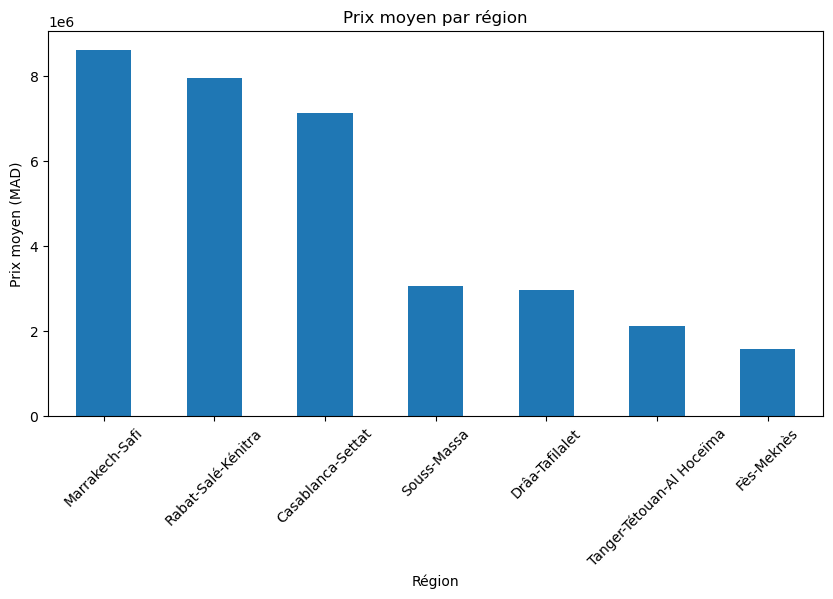

In [14]:
# visualiser le prix moyenne par region
plt.figure(figsize=(10,5))
prix_moyen_region.plot(kind="bar")

plt.title("Prix moyen par région")
plt.xlabel("Région")
plt.ylabel("Prix moyen (MAD)")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Matrice de corrélation
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Apartment'

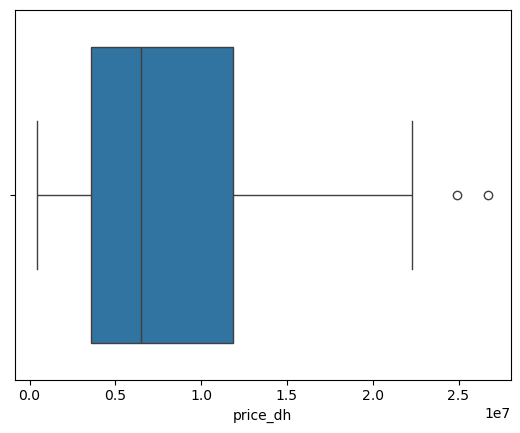

In [16]:
# detection des outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['price_dh'])
plt.show()


In [17]:
df.head()

,proprety_type,surface,bedroom,bathroom,address,city,principale,price_dh
0,Apartment,130.0,2,2,"Ennakhil-(Palmeraie), Marrakech, Marrakesh-Safi",Marrakech,Marrakech-Safi,5045690.0
1,House,400.0,4,6,"Ménara, Marrakech, Marrakech-Safi",Marrakech,Marrakech-Safi,14032400.0
2,Apartment,83.0,2,2,"Guéliz, Marrakech, Marrakech-Safi 40000",Marrakech,Marrakech-Safi,2580719.0
3,Apartment,127.0,3,2,"Anfa, Casablanca, Casablanca-Settat",Casablanca,Casablanca-Settat,6219190.0
4,Apartment,120.0,2,2,"Ménara, Marrakech, Marrakech-Safi",Marrakech,Marrakech-Safi,4367160.0


In [18]:
# Calcul des quartiles
Q1 = df['price_dh'].quantile(0.25)
Q3 = df['price_dh'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Repérer les outliers
outliers = df[(df['price_dh'] < lower_bound) | (df['price_dh'] > upper_bound)]

print("Outliers détectés :")
print(outliers[['proprety_type', 'surface', 'bedroom', 'bathroom', 'city', 'price_dh']])


Outliers détectés :
    proprety_type  surface  bedroom  bathroom        city     price_dh
26          House   570.01        4         1  Casablanca  26737459.07
115         House   568.01        4         5       Rabat  24922574.77


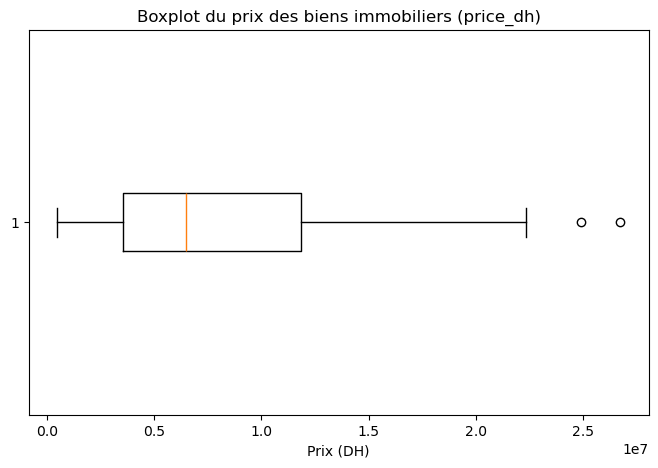

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df['price_dh'], vert=False)
plt.title("Boxplot du prix des biens immobiliers (price_dh)")
plt.xlabel("Prix (DH)")
plt.show()


In [20]:
# eliminer les outeliers avant de creer le modele: 
df_clean_1 = df[(df['price_dh'] >= lower_bound) & (df['price_dh'] <= upper_bound)]


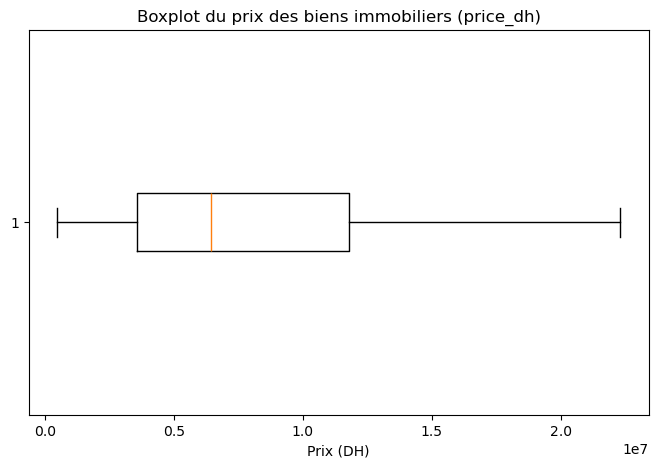

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df_clean_1['price_dh'], vert=False)
plt.title("Boxplot du prix des biens immobiliers (price_dh)")
plt.xlabel("Prix (DH)")
plt.show()